In [1]:
# Data processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

#Performance
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

print('finished loading libs')

finished loading libs


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import dataset and create dataframe
file='/content/drive/MyDrive/Colab_Notebooks/NZsoil.csv'
soil=pd.read_csv(file)
print(soil.shape)
df=pd.DataFrame(soil)
df.head()

(576, 11)


,site,pH,Bulk_density,Macroporosity_m10,OlsenP,TotalN,region,land_use,soil_order,time_step,within_target_range
0,1,5.92,1.220000,11.700000,33.122691,0.367750,Manawatu-Whanganui,Dairy,Gley,2014 - 2018,True
1,2,5.88,1.103333,14.400000,29.318160,0.597198,Manawatu-Whanganui,Dairy,Gley,2014 - 2018,True
2,3,6.24,1.123333,10.700000,44.120693,0.445854,Manawatu-Whanganui,Dairy,Gley,2014 - 2018,True
3,4,6.24,1.250000,15.800000,35.850908,0.406812,Manawatu-Whanganui,Dairy,Pallic,2014 - 2018,True
4,5,5.92,1.260000,10.033333,24.468567,0.366231,Manawatu-Whanganui,Drystock,Gley,2014 - 2018,True


In [4]:
# check attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   site                 576 non-null    object 
 1   pH                   576 non-null    float64
 2   Bulk_density         576 non-null    float64
 3   Macroporosity_m10    576 non-null    float64
 4   OlsenP               576 non-null    float64
 5   TotalN               576 non-null    float64
 6   region               576 non-null    object 
 7   land_use             576 non-null    object 
 8   soil_order           576 non-null    object 
 9   time_step            576 non-null    object 
 10  within_target_range  576 non-null    bool   
dtypes: bool(1), float64(5), object(5)
memory usage: 45.7+ KB


In [5]:
# check for nulls
df.isna().sum()

site                   0
pH                     0
Bulk_density           0
Macroporosity_m10      0
OlsenP                 0
TotalN                 0
region                 0
land_use               0
soil_order             0
time_step              0
within_target_range    0
dtype: int64

In [6]:
# description and summary of the numerical attributes
df.describe()

,pH,Bulk_density,Macroporosity_m10,OlsenP,TotalN
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,5.873669,0.990003,16.268915,27.748718,0.446941
std,0.455363,0.201367,4.914462,10.602443,0.130033
min,4.470000,0.506667,9.300000,5.000000,0.100000
25%,5.590000,0.831443,11.933333,21.000000,0.348034
50%,5.870000,1.000000,15.272101,27.500000,0.440000
75%,6.190000,1.147042,19.358333,35.908103,0.550000
max,7.300000,1.400000,30.000000,50.000000,0.694600


##Labels // Land Use
1.	Cropping: land  is of farmable quality for crops such as maize, onions, potatoes
2.	Dairy: land is suitable for dairy grazing such as cow farms
3.	Dry stock: land is suitable for dry stock such as: sheep, cows, deer…etc.
4.	Orchard/Vineyard: land is suitable for farming grapes, kiwifruits, apples, and horticulture[1].
5.	Exotic Forestry: land is suitable to plantation forestry[2].
6.	Lifestyle: semi-rural properties like houses with small land for personal farm
7.	Urban Park / Reserve: public parks and schools
8.	Scrub: indigenous and exotic lands.

##Features // Healthy Soil indicators are measured by:



*   pH: the measure of soil acidity, is the soil hospitable for plants and animals?
*   Total N: measure of how much organic material the soil contains for supplying nutrients, also indicates how well soil allows water and air flow
* OlsenP: the measure of soil fertility, the amount of phosphorus available usually added to soil from fertilizers
*Bulk Density: a physical measure of how dense the soil is, characteristic in determining air and water flow through the soil.
* Macroporosity: a physical measure of how much pore spaces the soil contains, characteristic in determining air and water flow through the soil.

## Data Visualization

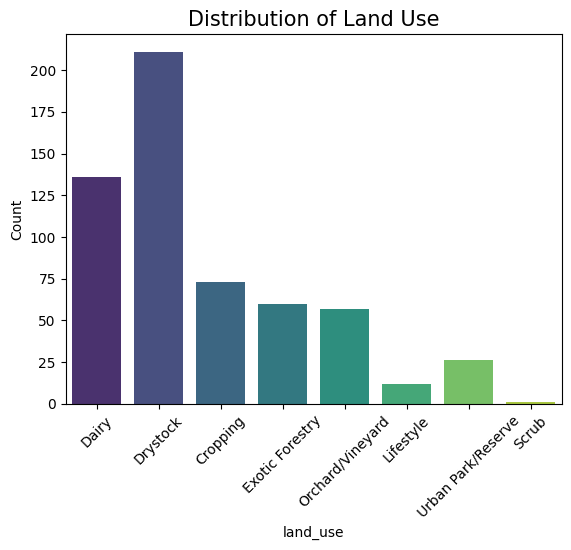

In [7]:
# check ditribution of labels
sns.countplot(x='land_use', data=df, hue='land_use', palette='viridis', legend=False)
plt.title("Distribution of Land Use", size=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

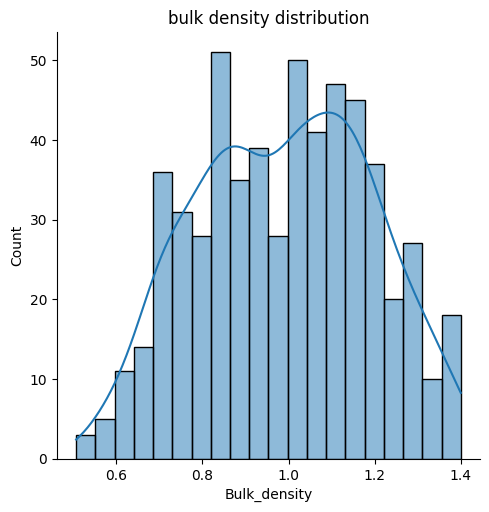

In [8]:
sns.displot(x=df['Bulk_density'],kde=True, bins=20)
plt.title("bulk density distribution")
plt.show()

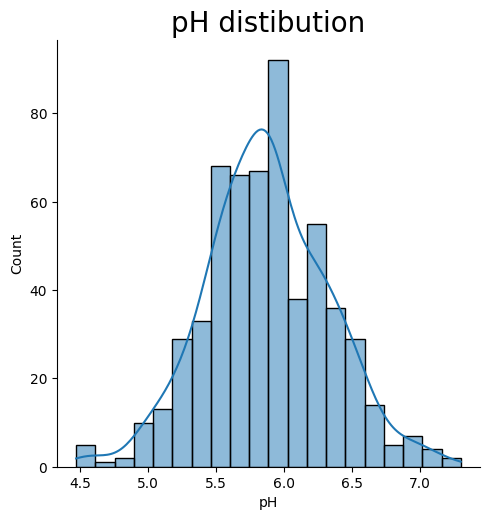

In [9]:
sns.displot(x=df['pH'],kde=True, bins=20)
plt.title("pH distibution",size=20)
plt.show()

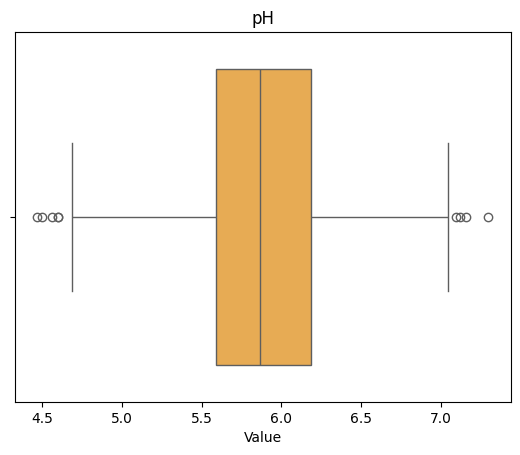

In [10]:
sns.boxplot(x=df['pH'], color='#ffb03b')
plt.title("pH")
plt.xlabel("Value")
plt.show()

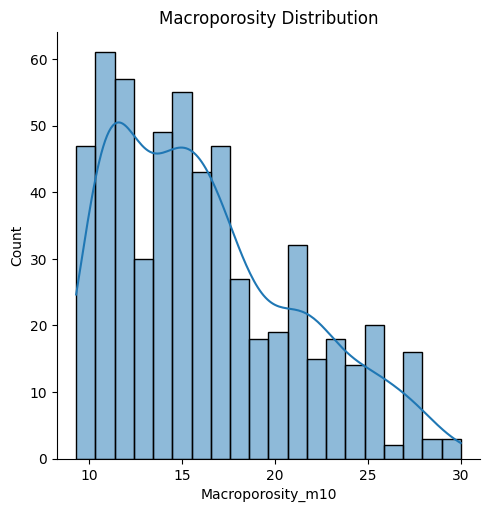

In [11]:
sns.displot(x=df['Macroporosity_m10'],kde=True, bins=20)
plt.title("Macroporosity Distribution")
plt.show()

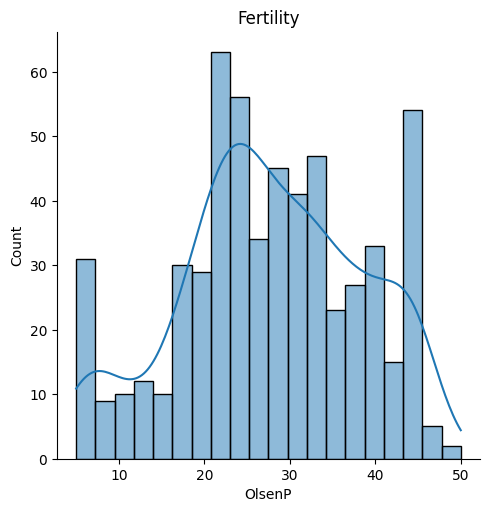

In [12]:
sns.displot(x=df['OlsenP'],kde=True, bins=20)
plt.title("Fertility")
plt.show()

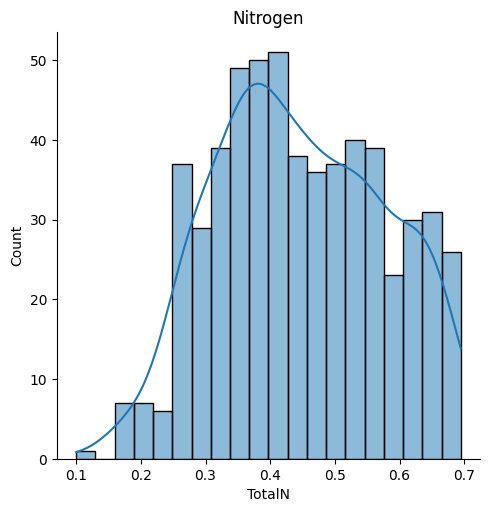

In [13]:
sns.displot(x=df['TotalN'],kde=True, bins=20)
plt.title("Nitrogen")
plt.show()

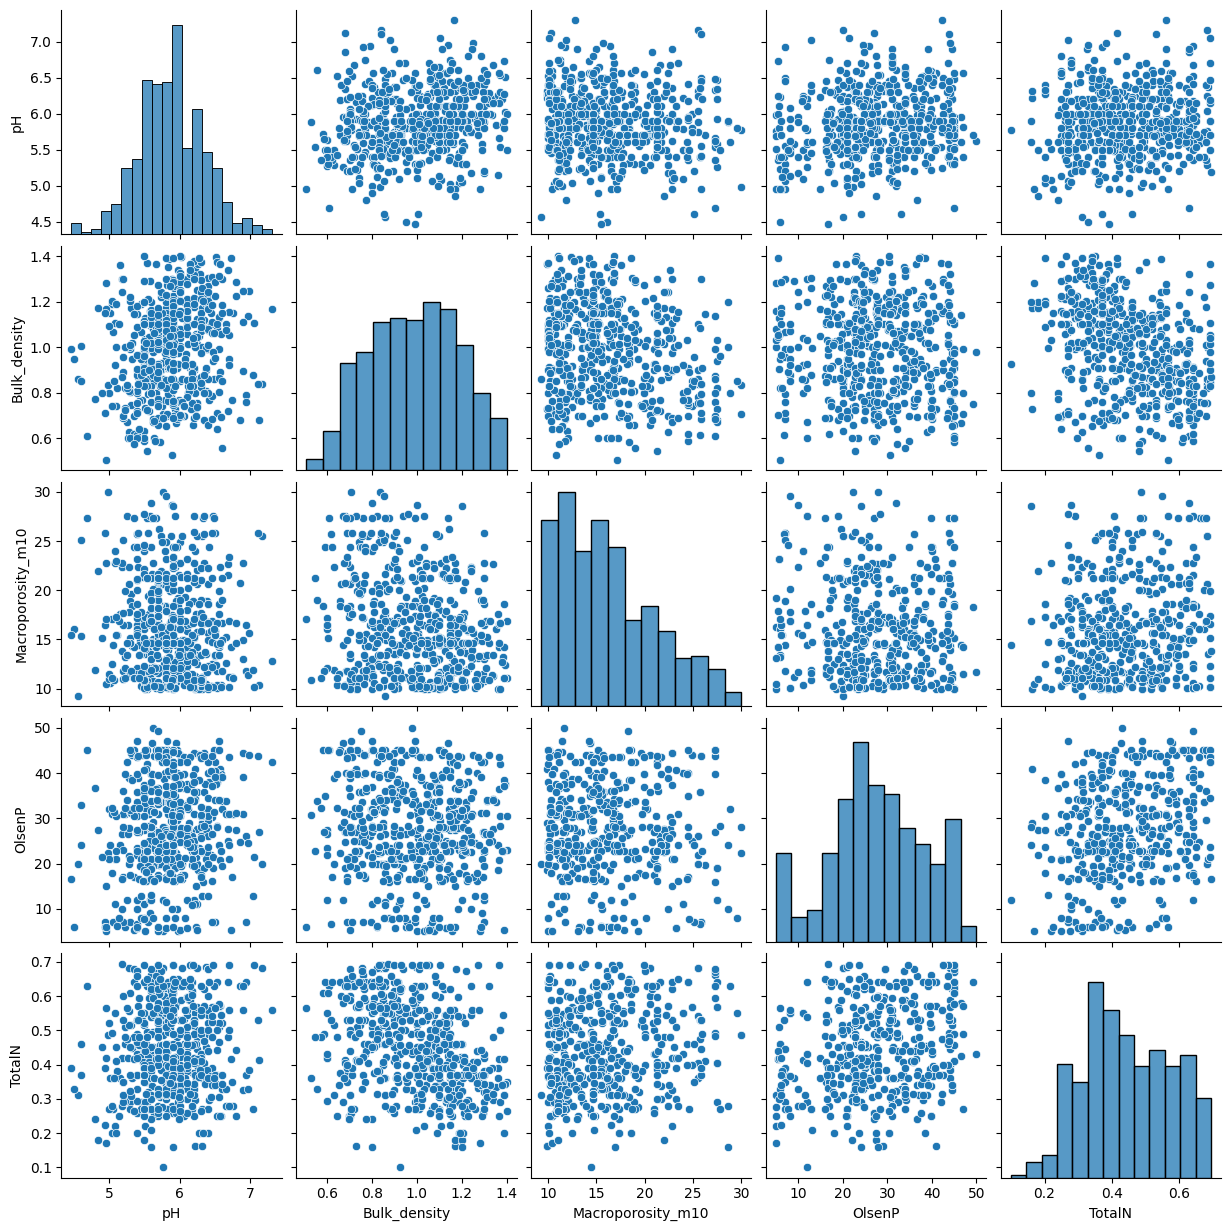

In [14]:
# represent and view any correlations and further understand data
sns.pairplot(data=df, vars=['pH','Bulk_density','Macroporosity_m10','OlsenP','TotalN'])
plt.show()

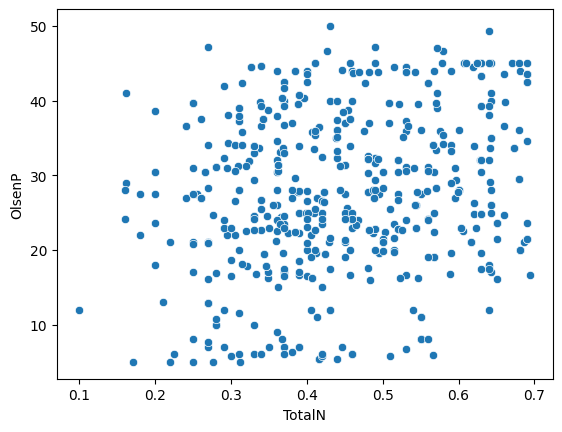

In [15]:
# a closer look for a correlation
sns.scatterplot(data=df, x='TotalN', y='OlsenP');

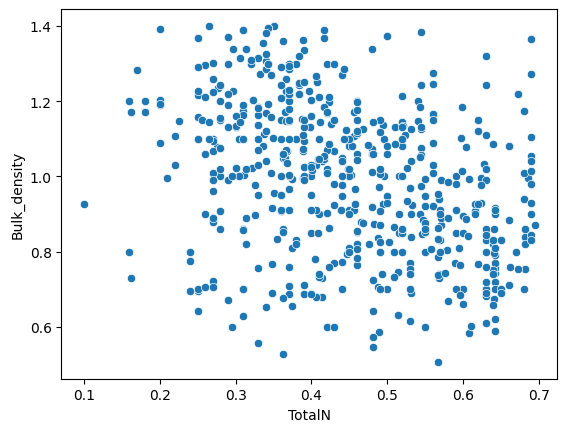

In [16]:
sns.scatterplot(data=df, x='TotalN', y='Bulk_density');

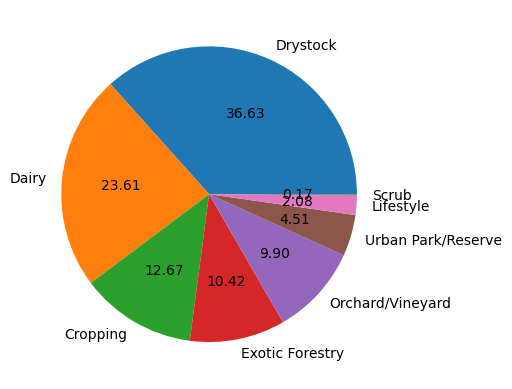

In [17]:
# define the x's and ys for data preprocessing
X=df[['Bulk_density', 'Macroporosity_m10','OlsenP','TotalN','pH']]
y=df['land_use']

# represent y values(land use) in pie chart
count = y.value_counts()
plt.pie(count, labels=count.index ,autopct= '%.2f')
plt.show()

In [18]:
#categories and how many values belong to each class
print(y.value_counts())

Drystock              211
Dairy                 136
Cropping               73
Exotic Forestry        60
Orchard/Vineyard       57
Urban Park/Reserve     26
Lifestyle              12
Scrub                   1
Name: land_use, dtype: int64


In [19]:
X.describe()

,Bulk_density,Macroporosity_m10,OlsenP,TotalN,pH
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.990003,16.268915,27.748718,0.446941,5.873669
std,0.201367,4.914462,10.602443,0.130033,0.455363
min,0.506667,9.300000,5.000000,0.100000,4.470000
25%,0.831443,11.933333,21.000000,0.348034,5.590000
50%,1.000000,15.272101,27.500000,0.440000,5.870000
75%,1.147042,19.358333,35.908103,0.550000,6.190000
max,1.400000,30.000000,50.000000,0.694600,7.300000


In [20]:
# feature scaling
scaler = MinMaxScaler()
# fit and transform the numerical data X
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.79850746, 0.11594203, 0.62494869, 0.4503027 , 0.51236749],
       [0.66791045, 0.24637681, 0.54040356, 0.83618775, 0.49823322],
       [0.69029851, 0.06763285, 0.86934872, 0.58165795, 0.6254417 ],
       ...,
       [0.75970149, 0.14170692, 0.86320575, 0.74435389, 0.70318021],
       [0.7141791 , 0.20128824, 0.56740154, 0.34563951, 0.53710247],
       [0.85447761, 0.04830918, 0.28497663, 0.4141441 , 0.49469965]])

In [21]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = ros.fit_resample(X_scaled, y)
print(X_over.shape)
print(y_over.shape)

(1688, 5)
(1688,)


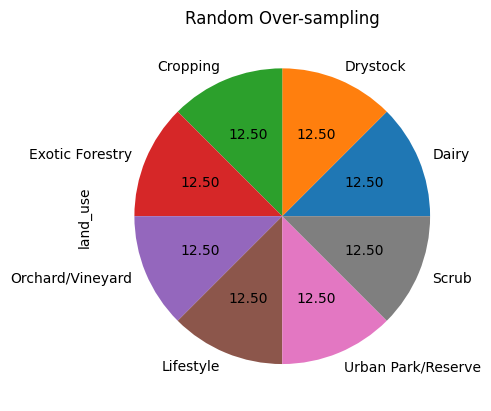

In [22]:
ax = y_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Over-sampling")

In [23]:
print(y_over.value_counts())

Dairy                 211
Drystock              211
Cropping              211
Exotic Forestry       211
Orchard/Vineyard      211
Lifestyle             211
Urban Park/Reserve    211
Scrub                 211
Name: land_use, dtype: int64


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size=0.30, random_state=42)
print('Training Data:', len(X_train))
print('Testing Data:', len(X_test))

Training Data: 1181
Testing Data: 507


In [25]:
#first multiclass classification is with logistic regression
model1=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model1.fit(X_train,y_train.values.ravel())

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [26]:
y_pred=model1.predict(X_test)
print('Logistic Regression Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Logistic Regression Accuracy:  0.4911242603550296


In [27]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

          Cropping       0.35      0.25      0.29        71
             Dairy       0.32      0.21      0.25        62
          Drystock       0.56      0.14      0.22        65
   Exotic Forestry       0.64      0.67      0.66        58
         Lifestyle       0.36      0.52      0.42        54
  Orchard/Vineyard       0.39      0.66      0.49        58
             Scrub       0.78      1.00      0.88        79
Urban Park/Reserve       0.42      0.42      0.42        60

          accuracy                           0.49       507
         macro avg       0.48      0.48      0.45       507
      weighted avg       0.49      0.49      0.46       507



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18, 13,  0,  1,  3, 30,  3,  3],
       [10, 13,  2,  2, 15,  7,  4,  9],
       [ 7,  7,  9,  9, 16,  6,  4,  7],
       [ 1,  0,  1, 39,  3,  3, 11,  0],
       [ 3,  7,  0,  4, 28,  0,  0, 12],
       [11,  1,  0,  1,  3, 38,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 79,  0],
       [ 2,  0,  4,  5, 10, 14,  0, 25]])

In [29]:
clf1=DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=8,  min_samples_split=40)
clf1.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(max_depth=8, min_samples_split=40, random_state=42)

In [30]:
y_pred1=clf1.predict(X_test)
print('Decision Tree Accuracy: ', metrics.accuracy_score(y_test, y_pred1))

Decision Tree Accuracy:  0.6548323471400395


In [31]:
print(classification_report(y_test, y_pred1))

                    precision    recall  f1-score   support

          Cropping       0.69      0.41      0.51        71
             Dairy       0.29      0.27      0.28        62
          Drystock       0.39      0.35      0.37        65
   Exotic Forestry       0.82      0.78      0.80        58
         Lifestyle       0.68      1.00      0.81        54
  Orchard/Vineyard       0.61      0.60      0.61        58
             Scrub       1.00      1.00      1.00        79
Urban Park/Reserve       0.65      0.83      0.73        60

          accuracy                           0.65       507
         macro avg       0.64      0.66      0.64       507
      weighted avg       0.65      0.65      0.64       507



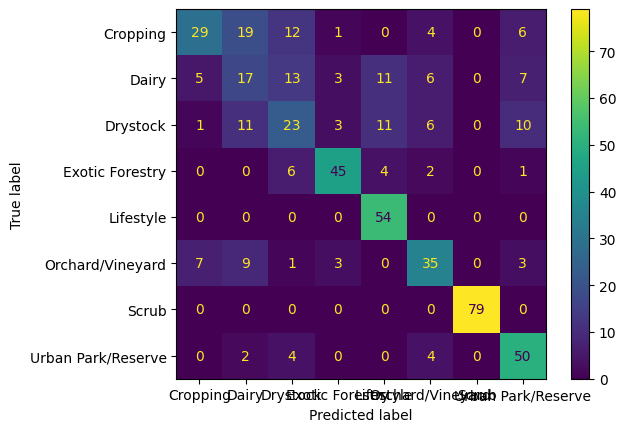

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

In [33]:
#values ravel is for an error i kept getting about the nature of y, being a 1d array, so we change the shape with ravel
clf2=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=8, random_state=80)
clf2.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=8, random_state=80)

In [34]:
y_pred2=clf2.predict(X_test)
print('Random Forest Accuracy: ', metrics.accuracy_score(y_test, y_pred2))

Random Forest Accuracy:  0.8303747534516766


In [35]:
print(classification_report(y_test, y_pred2))

                    precision    recall  f1-score   support

          Cropping       0.88      0.79      0.83        71
             Dairy       0.64      0.55      0.59        62
          Drystock       0.57      0.48      0.52        65
   Exotic Forestry       0.87      0.91      0.89        58
         Lifestyle       0.82      1.00      0.90        54
  Orchard/Vineyard       0.83      0.93      0.88        58
             Scrub       1.00      1.00      1.00        79
Urban Park/Reserve       0.92      1.00      0.96        60

          accuracy                           0.83       507
         macro avg       0.82      0.83      0.82       507
      weighted avg       0.82      0.83      0.82       507



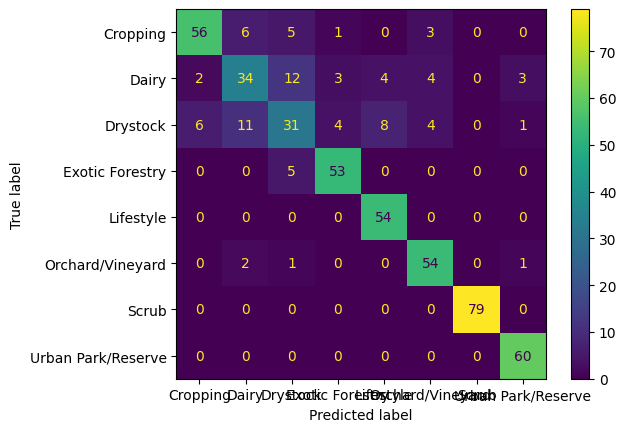

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [37]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [38]:
y_pred3=knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

KNN Accuracy:  0.727810650887574


In [39]:
print(classification_report(y_test, y_pred3))

                    precision    recall  f1-score   support

          Cropping       0.57      0.51      0.54        71
             Dairy       0.50      0.53      0.52        62
          Drystock       0.47      0.37      0.41        65
   Exotic Forestry       0.85      0.69      0.76        58
         Lifestyle       0.93      1.00      0.96        54
  Orchard/Vineyard       0.64      0.79      0.71        58
             Scrub       0.98      1.00      0.99        79
Urban Park/Reserve       0.83      0.95      0.88        60

          accuracy                           0.73       507
         macro avg       0.72      0.73      0.72       507
      weighted avg       0.72      0.73      0.72       507



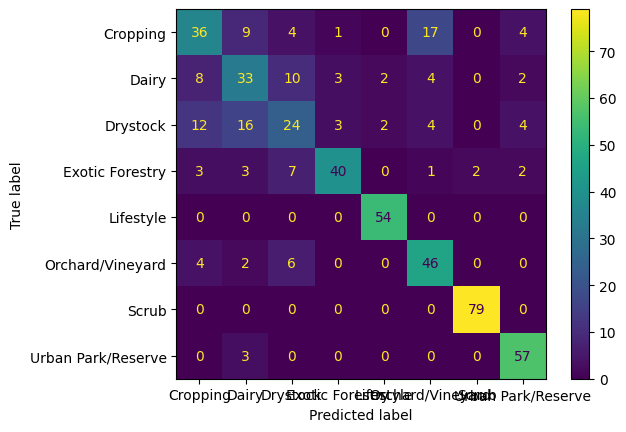

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.show()

# CNN

In [41]:
#a function to chnage classes from categorical to numerical
from sklearn.preprocessing import OrdinalEncoder

def prepare_targets(y_train,y_test):
    oe = OrdinalEncoder()
    oe.fit(y_train)
    y_train_encoded=oe.transform(y_train)
    y_test_encoded=oe.transform(y_test)
    return y_train_encoded,y_test_encoded

In [42]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

y_train_encoded, y_test_encoded= prepare_targets(y_train,y_test)

enc=pd.DataFrame(y_train_encoded)
enc.head(10)

,0
0,4.0
1,0.0
2,2.0
3,7.0
4,1.0
5,2.0
6,7.0
7,0.0
8,5.0
9,5.0


In [43]:
#simple neural network with 5 layers
nn = Sequential()
nn.add(Flatten(input_dim=5)) #input layer
nn.add(Dense(10,activation='relu')) #hidden 1
nn.add(Dense(60,activation='relu')) #hidden 2
nn.add(Dense(20,activation='relu')) #hidden 3
nn.add(Dense(8,activation='softmax')) #output layer
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 60)                660       
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 8)                 168       
                                                                 
Total params: 2108 (8.23 KB)
Trainable params: 2108 (8.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
#compiling the model
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
print("finished compiling")


finished compiling


In [45]:
#training and validating the model
history=nn.fit(X_train,y_train_encoded,epochs=1400,verbose=True, validation_split=0.4)

Epoch 1/1400
23/23 [==============================] - 1s 11ms/step - loss: 2.0735 - accuracy: 0.1314 - val_loss: 2.0665 - val_accuracy: 0.1480
Epoch 2/1400
23/23 [==============================] - 0s 3ms/step - loss: 2.0581 - accuracy: 0.1667 - val_loss: 2.0508 - val_accuracy: 0.1353
Epoch 3/1400
23/23 [==============================] - 0s 3ms/step - loss: 2.0410 - accuracy: 0.1935 - val_loss: 2.0295 - val_accuracy: 0.1649
Epoch 4/1400
23/23 [==============================] - 0s 3ms/step - loss: 2.0144 - accuracy: 0.2599 - val_loss: 1.9903 - val_accuracy: 0.3002
Epoch 5/1400
23/23 [==============================] - 0s 3ms/step - loss: 1.9784 - accuracy: 0.2895 - val_loss: 1.9424 - val_accuracy: 0.3488
Epoch 6/1400
23/23 [==============================] - 0s 3ms/step - loss: 1.9313 - accuracy: 0.3107 - val_loss: 1.8793 - val_accuracy: 0.3467
Epoch 7/1400
23/23 [==============================] - 0s 3ms/step - loss: 1.8769 - accuracy: 0.3319 - val_loss: 1.8110 - val_accuracy: 0.3108
Epoch

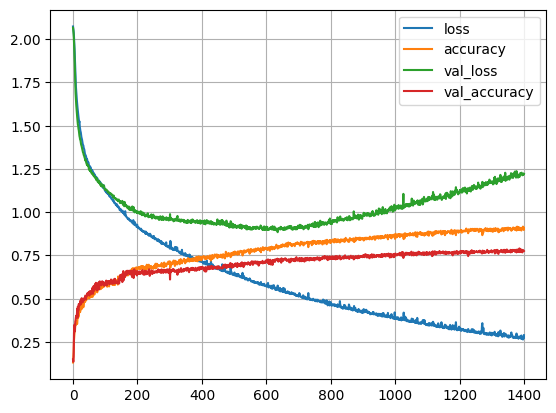

In [46]:
#visualize training performance
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
# plt.gca().set_ylim(0,1)
plt.show()

In [47]:
#predict with testing data
y_pred4=nn.evaluate(X_test,y_test_encoded)

16/16 [==============================] - 0s 1ms/step - loss: 1.1472 - accuracy: 0.7870
